In [36]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
housing=fetch_california_housing ()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

In [37]:
print(df.isnull().sum())  # Should be all 0
print(df.shape)           # (20640, 9)

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
(20640, 9)


In [38]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)



In [42]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # No scaling needed
y_pred_lr = lr.predict(X_test_scaled)    # Linear Regression predictions
y_pred_rf = rf.predict(X_test)           # Random Forest predictions

In [43]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

def evaluate(y_true, y_pred, name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} → RMSE: {rmse:.4f} | MAE: {mae:.4f} | R²: {r2:.4f}")

evaluate(y_test, y_pred_lr, "Linear Reg")
evaluate(y_test, y_pred_rf, "Random Forest")

Linear Reg → RMSE: 0.7456 | MAE: 0.5332 | R²: 0.5758
Random Forest → RMSE: 0.5053 | MAE: 0.3275 | R²: 0.8051


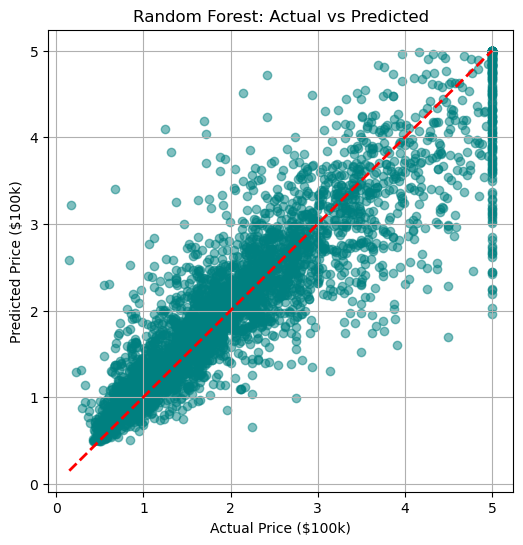

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price ($100k)")
plt.ylabel("Predicted Price ($100k)")
plt.title("Random Forest: Actual vs Predicted")
plt.grid(True)
plt.show()

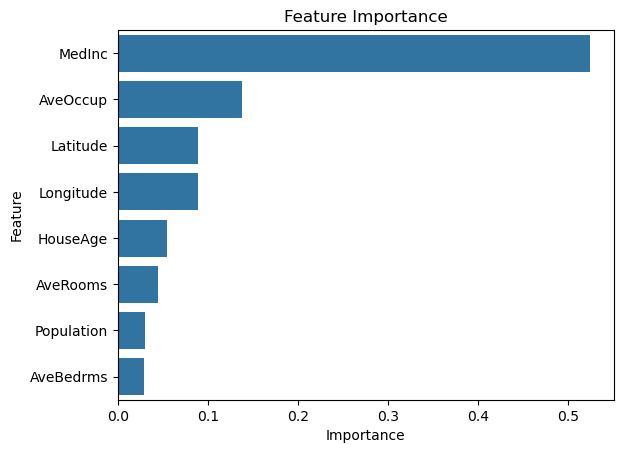

      Feature  Importance
0      MedInc    0.524871
5    AveOccup    0.138443
6    Latitude    0.088936
7   Longitude    0.088629
1    HouseAge    0.054593
2    AveRooms    0.044272
4  Population    0.030650
3   AveBedrms    0.029606


In [45]:
import seaborn as sns

feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

sns.barplot(data=feat_imp, x='Importance', y='Feature')
plt.title("Feature Importance")
plt.show()

print(feat_imp)